# Natural Language Processing - Text Classification example

### 0 - Setup

###### Import pckgs

In [1]:
import warnings
warnings.filterwarnings("ignore")
from nlp_utils2 import *

###### Import data

In [2]:
import json

lst_dics = []
with open('data_news.json', mode='r', errors='ignore') as json_file:
    for dic in json_file:
        lst_dics.append( json.loads(dic) )
    
lst_dics[0]

{'category': 'CRIME',
 'headline': 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV',
 'authors': 'Melissa Jeltsen',
 'link': 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
 'short_description': 'She left her husband. He killed their children. Just another day in America.',
 'date': '2018-05-26'}

In [3]:
dtf = pd.DataFrame(lst_dics)
dtf = dtf[ dtf["category"].isin(['ENTERTAINMENT','SPORTS','TECH']) ][["category","headline"]]
dtf = dtf.rename(columns={"category":"y", "headline":"text"})

In [4]:
dtf.sample(5)

,y,text
43382,ENTERTAINMENT,Kaley Cuoco's BDSM 'Big Bang' Photo Might Actu...
93965,ENTERTAINMENT,Is Music Dead? (Thoughts on the Music Industry...
143192,TECH,Internet Freedom: A Disturbing View From the T...
59807,SPORTS,MMA Fighter Falls Right To The Mat After Bruta...
85671,SPORTS,One Out Away: What It's Like To Lose A Perfect...


In [5]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23024 entries, 1 to 200852
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       23024 non-null  object
 1   text    23024 non-null  object
dtypes: object(2)
memory usage: 539.6+ KB


### 1 - Text Analysis

###### Look for Metadata
- Language detection
- Named-entities recognition
- Text cleaning
- Length analysis
- Sentiment analysis
- Word frequency

###### Target Variable

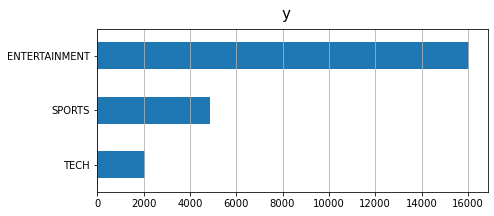

In [6]:
plot_distributions(dtf,x="y",figsize=(7,3))

In [ ]:
# Imbalanced

###### Language Detection

In [7]:
# this takes a while
dtf = add_detect_lang(dtf, "text")
dtf.head()

,y,text,lang
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,en
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,en
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,en
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,en
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,en


In [8]:
# check
i = 0
print(dtf["text"].iloc[i], " --> ", dtf["lang"].iloc[i])

Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  en


In [9]:
dtf_n=dtf.copy()
dtf_n

,y,text,lang
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,en
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,en
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,en
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,en
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,en
...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,en
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,en
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",en
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,en


<AxesSubplot:>

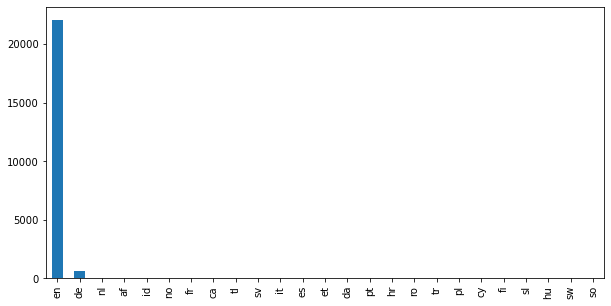

In [10]:
dtf_n.lang.value_counts().plot(kind='bar',figsize=(10,5))

In [11]:
# filter english only
dtf_n = dtf[dtf["lang"]=="en"]
dtf_n.shape

(22076, 3)

###### Named-Entity Recognition

In [12]:
ner = spacy.load("en_core_web_lg")

In [13]:
lst_tag_type = ["ORG","PERSON","NORP","GPE","LOC","FAC","EVENT","PRODUCT","WORK_OF_ART"]

In [14]:
ner_displacy(dtf_n["text"].iloc[0], ner, lst_tag_type, title="NER example")

In [15]:
# example of replacing text and tags extraction
utils_ner_text(dtf_n["text"].iloc[0], ner, lst_tag_type, grams_join="_")

("Will Smith Joins Diplo And Nicky_Jam For The_2018_World_Cup's Official Song",
 [('Diplo', 'PERSON'),
  ('Nicky Jam', 'PERSON'),
  ("The 2018 World Cup's", 'EVENT')])

In [16]:
dtf_n=dtf_n.sample(frac=0.05)

In [17]:
# this takes a while
dtf_n = add_ner_spacy(dtf_n, "text", ner, lst_tag_type, grams_join="_", create_features=True)
dtf_n.head()

--- tagging ---
--- counting tags ---
--- creating features ---


,y,text,lang,text_tagged,tags,tags_PERSON,tags_LOC,tags_FAC,tags_ORG,tags_PRODUCT,tags_WORK_OF_ART,tags_NORP,tags_GPE,tags_EVENT
80156,ENTERTAINMENT,Kit Harington Might Have Just Revealed The Tru...,en,Kit_Harington Might Have Just Revealed The_Tru...,"[{('Kit Harington', 'PERSON'): 1}, {('The True...",1,0,0,0,0,1,0,0,0
143199,ENTERTAINMENT,Gene Simmons On Kurt Cobain And Amy Winehouse:...,en,Gene_Simmons On Kurt_Cobain And Amy_Winehouse:...,"[{('Gene Simmons', 'PERSON'): 1}, {('Kurt Coba...",3,0,0,0,0,0,0,0,0
83967,ENTERTAINMENT,Where's Black Widow? Twitter Calls Marvel Out ...,en,Where's Black_Widow? Twitter Calls Marvel_Out_...,"[{('Black Widow', 'EVENT'): 1}, {('Marvel Out ...",0,0,0,0,0,1,0,0,1
41733,ENTERTAINMENT,Ellen DeGeneres Was Denied Entry Into The Whit...,en,Ellen_DeGeneres_Was Denied Entry Into The Whit...,"[{('Ellen DeGeneres Was', 'PERSON'): 1}, {('Si...",1,0,0,1,0,0,0,0,0
35778,SPORTS,Nike CEO Blasts Trump Executive Order Targetin...,en,Nike CEO Blasts Trump_Executive_Order_Targetin...,"[{('Nike', 'ORG'): 1}, {('Trump Executive Orde...",0,0,0,2,0,0,0,0,0


In [18]:
dtf_n.shape

(1104, 14)

In [19]:
# check
i = 17
print(dtf_n["text"].iloc[i], " --> ")
print(dtf_n["text_tagged"].iloc[i])
print("tags:")
dtf_n["tags"].iloc[i]

Iggy Azalea And Weird Al?!  --> 
Iggy_Azalea And Weird Al?!
tags:


[{('Iggy Azalea', 'PERSON'): 1}]

# ENTERTAINMENT:


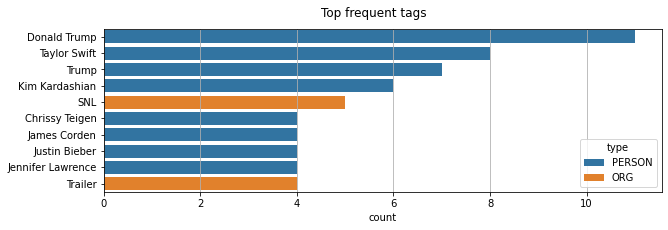

# SPORTS:


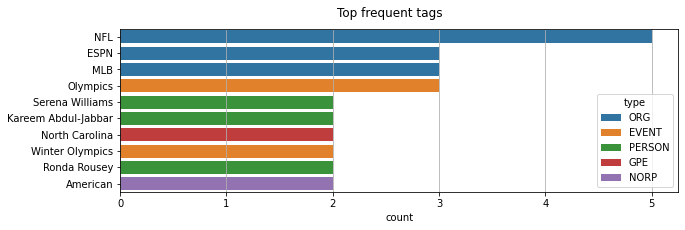

# TECH:


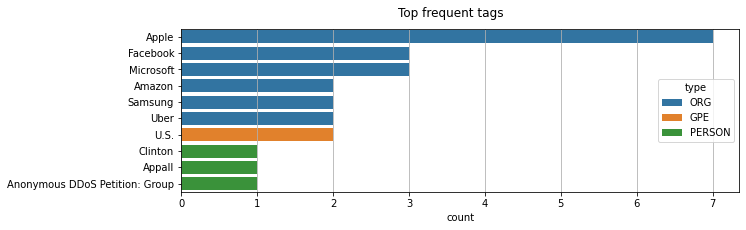

In [20]:
for y in dtf_n["y"].unique():
    print("# {}:".format(y))
    common_tags = tags_freq(tags=dtf_n[dtf_n["y"]==y]["tags"], top=10, figsize=(10,3))

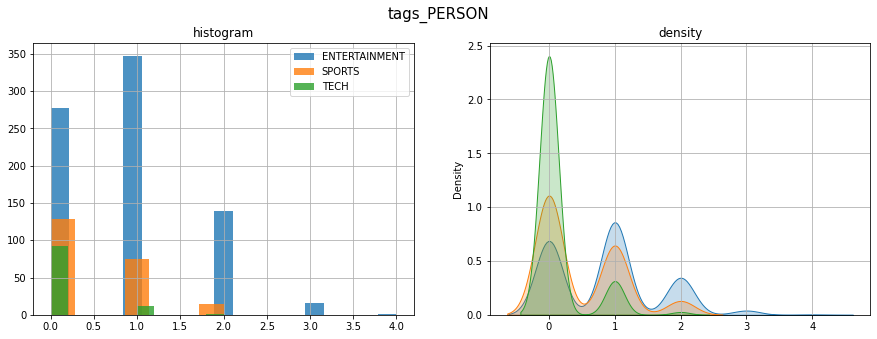

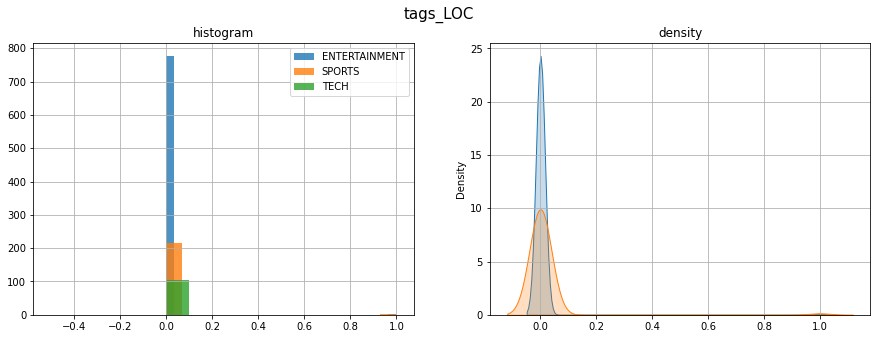

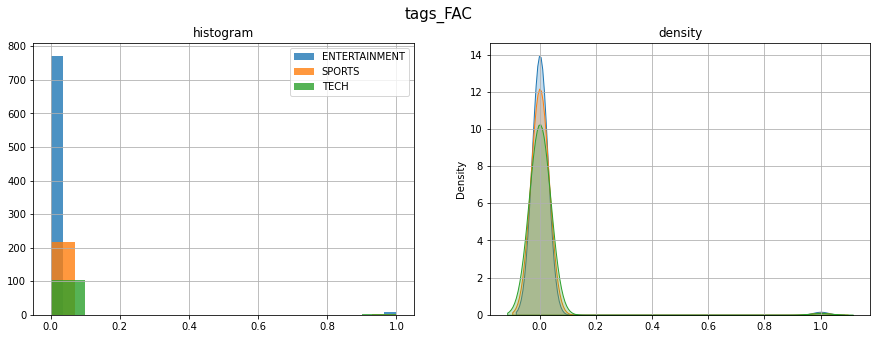

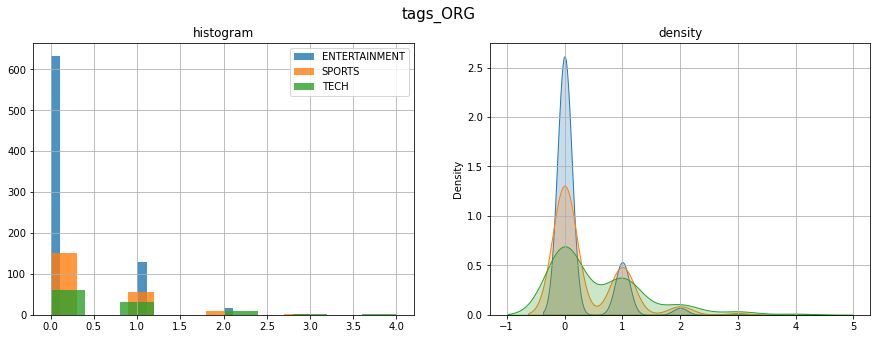

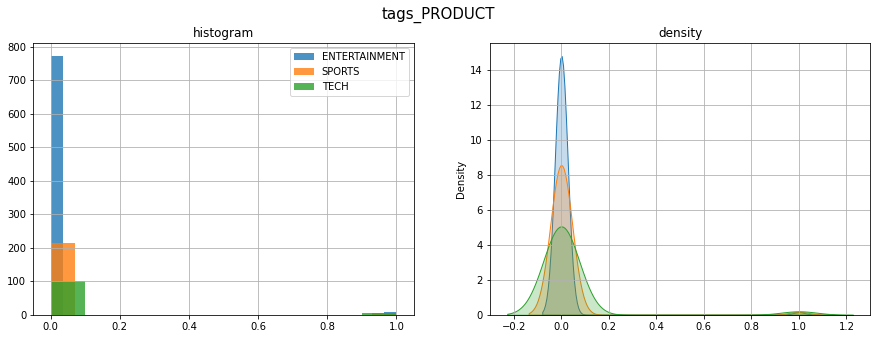

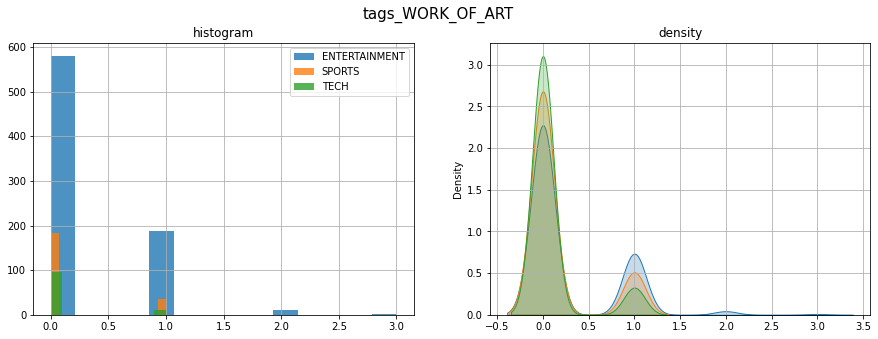

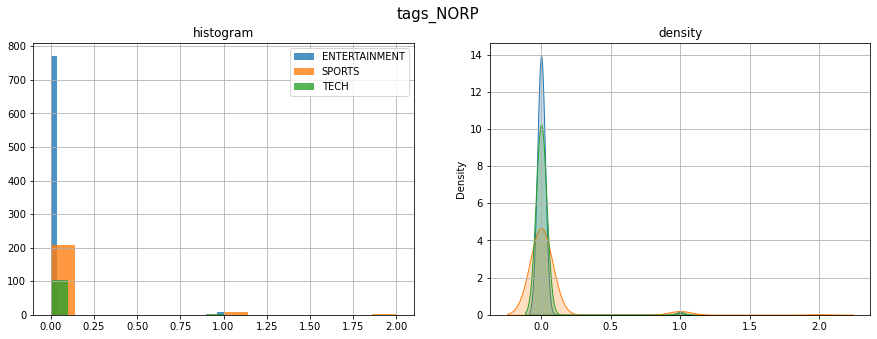

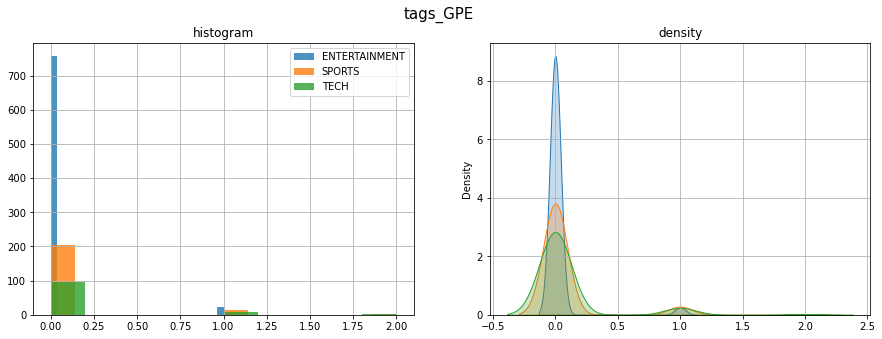

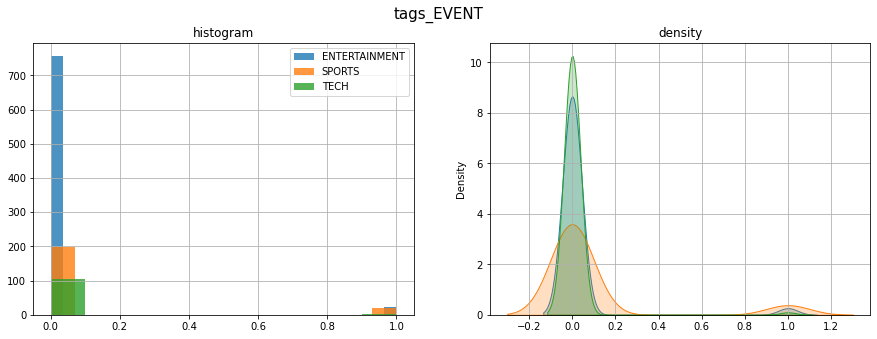

In [21]:
# tags bivariate distribution
for x in dtf_n.filter(like="tags_", axis=1).columns:
    plot_distributions(dtf_n, x=x, y="y", bins=None, figsize=(15,5))

###### Text Cleaning

In [22]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Bhavay
[nltk_data]     Pant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
# example
i = 0
print("--- original ---")
print(dtf_n["text"].iloc[i])

print("--- cleaning ---")
print(utils_preprocess_text(dtf_n["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=None, stemm=False, lemm=True))

print("--- tokenization ---")
print(dtf_n["text"].iloc[i].split())

print("--- remove stopwords ---")
print(utils_preprocess_text(dtf_n["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      stemm=False, lemm=None))

print("--- stemming ---")
print(utils_preprocess_text(dtf_n["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      stemm=True, lemm=False))

print("--- lemmatisation ---")
print(utils_preprocess_text(dtf_n["text"].iloc[i], lst_regex=None, 
                      lst_stopwords=nltk.corpus.stopwords.words("english"), 
                      stemm=False, lemm=True))

--- original ---
Kit Harington Might Have Just Revealed The True Fate Of Jon Snow
--- cleaning ---
kit harington might have just revealed the true fate of jon snow
--- tokenization ---
['Kit', 'Harington', 'Might', 'Have', 'Just', 'Revealed', 'The', 'True', 'Fate', 'Of', 'Jon', 'Snow']
--- remove stopwords ---
kit harington might revealed true fate jon snow
--- stemming ---
kit harington might reveal true fate jon snow
--- lemmatisation ---
kit harington might revealed true fate jon snow


In [24]:
# create stopwords
lst_stopwords = create_stopwords(["english"], 
                                 lst_add_words=["dtype","say","new","length","object","u","ha","wa"],
                                 lst_keep_words=["new"])
lst_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'dtype',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'ha',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'length',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'object',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'o

In [25]:
# preprocess text
dtf_n = add_preprocessed_text(dtf_n, "text", lst_regex=None, lst_stopwords=lst_stopwords, stemm=False, lemm=True)
dtf_n.head()

,y,text,lang,text_tagged,tags,tags_PERSON,tags_LOC,tags_FAC,tags_ORG,tags_PRODUCT,tags_WORK_OF_ART,tags_NORP,tags_GPE,tags_EVENT,text_clean
80156,ENTERTAINMENT,Kit Harington Might Have Just Revealed The Tru...,en,Kit_Harington Might Have Just Revealed The_Tru...,"[{('Kit Harington', 'PERSON'): 1}, {('The True...",1,0,0,0,0,1,0,0,0,Kit Harington Might Have Just Revealed The Tru...
143199,ENTERTAINMENT,Gene Simmons On Kurt Cobain And Amy Winehouse:...,en,Gene_Simmons On Kurt_Cobain And Amy_Winehouse:...,"[{('Gene Simmons', 'PERSON'): 1}, {('Kurt Coba...",3,0,0,0,0,0,0,0,0,Gene Simmons On Kurt Cobain And Amy Winehouse:...
83967,ENTERTAINMENT,Where's Black Widow? Twitter Calls Marvel Out ...,en,Where's Black_Widow? Twitter Calls Marvel_Out_...,"[{('Black Widow', 'EVENT'): 1}, {('Marvel Out ...",0,0,0,0,0,1,0,0,1,Where's Black Widow? Twitter Calls Marvel Out ...
41733,ENTERTAINMENT,Ellen DeGeneres Was Denied Entry Into The Whit...,en,Ellen_DeGeneres_Was Denied Entry Into The Whit...,"[{('Ellen DeGeneres Was', 'PERSON'): 1}, {('Si...",1,0,0,1,0,0,0,0,0,Ellen DeGeneres Was Denied Entry Into The Whit...
35778,SPORTS,Nike CEO Blasts Trump Executive Order Targetin...,en,Nike CEO Blasts Trump_Executive_Order_Targetin...,"[{('Nike', 'ORG'): 1}, {('Trump Executive Orde...",0,0,0,2,0,0,0,0,0,Nike CEO Blasts Trump Executive Order Targetin...


In [26]:
# check
i = 0
print(dtf_n["text"].iloc[i], " --> ")
print(dtf_n["text_clean"].iloc[i])

Kit Harington Might Have Just Revealed The True Fate Of Jon Snow  --> 
Kit Harington Might Have Just Revealed The True Fate Of Jon Snow


###### Length Analysis

In [27]:
dtf_n = add_text_length(dtf_n, "text_clean")
dtf_n.head()

                      min       mean    max
char_count           16.0  53.912138  110.0
word_count            2.0  11.623188   28.0
sentence_count        1.0   1.036232    4.0
avg_word_length       2.2   4.731126    8.5
avg_sentence_lenght   2.0  11.389191   28.0


,y,text,lang,text_tagged,tags,tags_PERSON,tags_LOC,tags_FAC,tags_ORG,tags_PRODUCT,tags_WORK_OF_ART,tags_NORP,tags_GPE,tags_EVENT,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght
80156,ENTERTAINMENT,Kit Harington Might Have Just Revealed The Tru...,en,Kit_Harington Might Have Just Revealed The_Tru...,"[{('Kit Harington', 'PERSON'): 1}, {('The True...",1,0,0,0,0,1,0,0,0,Kit Harington Might Have Just Revealed The Tru...,12,53,1,4.416667,12.0
143199,ENTERTAINMENT,Gene Simmons On Kurt Cobain And Amy Winehouse:...,en,Gene_Simmons On Kurt_Cobain And Amy_Winehouse:...,"[{('Gene Simmons', 'PERSON'): 1}, {('Kurt Coba...",3,0,0,0,0,0,0,0,0,Gene Simmons On Kurt Cobain And Amy Winehouse:...,23,83,1,3.608696,23.0
83967,ENTERTAINMENT,Where's Black Widow? Twitter Calls Marvel Out ...,en,Where's Black_Widow? Twitter Calls Marvel_Out_...,"[{('Black Widow', 'EVENT'): 1}, {('Marvel Out ...",0,0,0,0,0,1,0,0,1,Where's Black Widow? Twitter Calls Marvel Out ...,14,61,2,4.357143,7.0
41733,ENTERTAINMENT,Ellen DeGeneres Was Denied Entry Into The Whit...,en,Ellen_DeGeneres_Was Denied Entry Into The Whit...,"[{('Ellen DeGeneres Was', 'PERSON'): 1}, {('Si...",1,0,0,1,0,0,0,0,0,Ellen DeGeneres Was Denied Entry Into The Whit...,13,65,1,5.000000,13.0
35778,SPORTS,Nike CEO Blasts Trump Executive Order Targetin...,en,Nike CEO Blasts Trump_Executive_Order_Targetin...,"[{('Nike', 'ORG'): 1}, {('Trump Executive Orde...",0,0,0,2,0,0,0,0,0,Nike CEO Blasts Trump Executive Order Targetin...,10,57,1,5.700000,10.0


In [28]:
# check
i = 0
print(dtf_n["text_clean"].iloc[i], " --> ")
for col in ["word_count","char_count","sentence_count","avg_word_length","avg_sentence_lenght"]:
    print(col+":", dtf_n[col].iloc[i])

Kit Harington Might Have Just Revealed The True Fate Of Jon Snow  --> 
word_count: 12
char_count: 53
sentence_count: 1
avg_word_length: 4.416666666666667
avg_sentence_lenght: 12.0


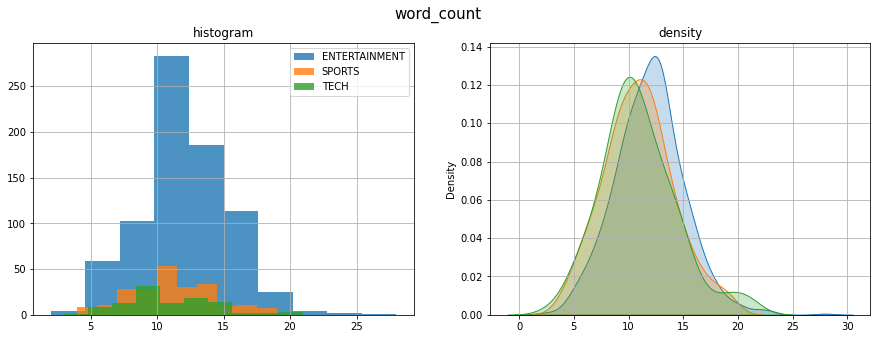

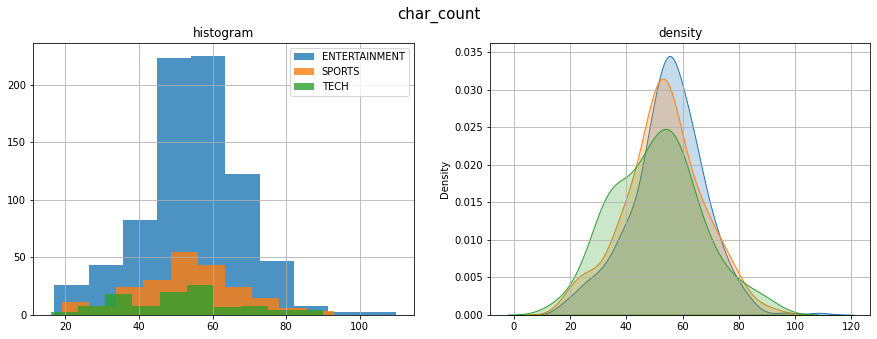

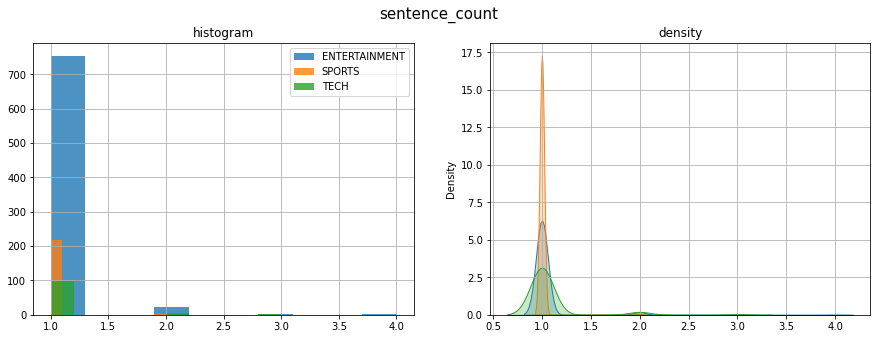

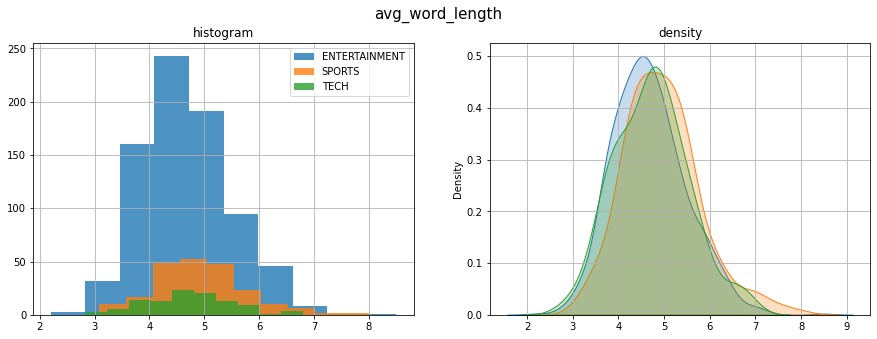

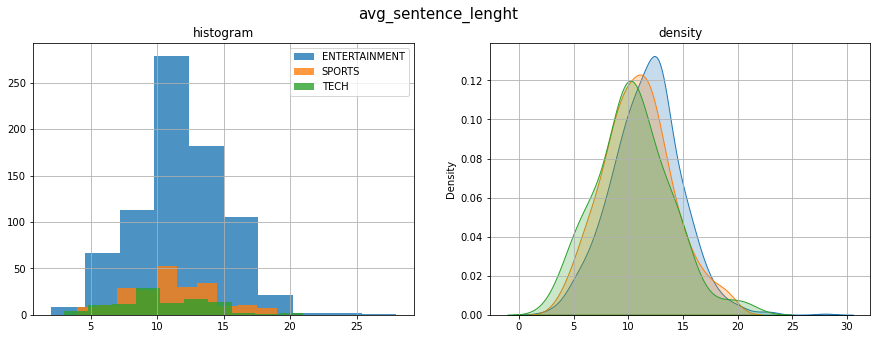

In [29]:
for col in ["word_count","char_count","sentence_count","avg_word_length","avg_sentence_lenght"]:
    plot_distributions(dtf_n, x=col, y="y", bins=10, figsize=(15,5))

###### Sentiment Analysis

In [30]:
dtf_n = add_sentiment(dtf_n, "text_clean", algo="textblob", sentiment_range=(-1,1))
dtf_n.head()

            count      mean      std  min  25%  50%  75%  max
sentiment  1104.0  0.090201  0.30725 -1.0  0.0  0.0  0.2  1.0


,y,text,lang,text_tagged,tags,tags_PERSON,tags_LOC,tags_FAC,tags_ORG,tags_PRODUCT,...,tags_NORP,tags_GPE,tags_EVENT,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment
80156,ENTERTAINMENT,Kit Harington Might Have Just Revealed The Tru...,en,Kit_Harington Might Have Just Revealed The_Tru...,"[{('Kit Harington', 'PERSON'): 1}, {('The True...",1,0,0,0,0,...,0,0,0,Kit Harington Might Have Just Revealed The Tru...,12,53,1,4.416667,12.0,0.350000
143199,ENTERTAINMENT,Gene Simmons On Kurt Cobain And Amy Winehouse:...,en,Gene_Simmons On Kurt_Cobain And Amy_Winehouse:...,"[{('Gene Simmons', 'PERSON'): 1}, {('Kurt Coba...",3,0,0,0,0,...,0,0,0,Gene Simmons On Kurt Cobain And Amy Winehouse:...,23,83,1,3.608696,23.0,0.000000
83967,ENTERTAINMENT,Where's Black Widow? Twitter Calls Marvel Out ...,en,Where's Black_Widow? Twitter Calls Marvel_Out_...,"[{('Black Widow', 'EVENT'): 1}, {('Marvel Out ...",0,0,0,0,0,...,0,0,1,Where's Black Widow? Twitter Calls Marvel Out ...,14,61,2,4.357143,7.0,-0.166667
41733,ENTERTAINMENT,Ellen DeGeneres Was Denied Entry Into The Whit...,en,Ellen_DeGeneres_Was Denied Entry Into The Whit...,"[{('Ellen DeGeneres Was', 'PERSON'): 1}, {('Si...",1,0,0,1,0,...,0,0,0,Ellen DeGeneres Was Denied Entry Into The Whit...,13,65,1,5.000000,13.0,0.000000
35778,SPORTS,Nike CEO Blasts Trump Executive Order Targetin...,en,Nike CEO Blasts Trump_Executive_Order_Targetin...,"[{('Nike', 'ORG'): 1}, {('Trump Executive Orde...",0,0,0,2,0,...,0,0,0,Nike CEO Blasts Trump Executive Order Targetin...,10,57,1,5.700000,10.0,0.000000


In [31]:
# check
i = 0
print(dtf_n["text"].iloc[i], " --> ", dtf_n["sentiment"].iloc[i])

Kit Harington Might Have Just Revealed The True Fate Of Jon Snow  -->  0.35


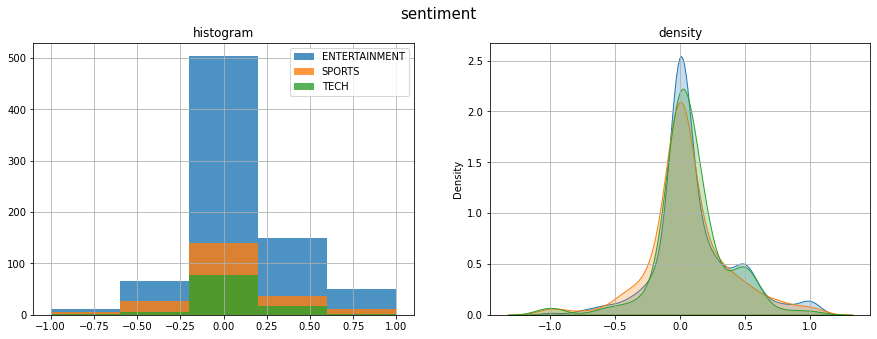

In [32]:
plot_distributions(dtf_n, x="sentiment", y="y", bins=5, figsize=(15,5))

In [33]:
# I'll give a range of 0-1 to the sentiment
dtf_n = add_sentiment(dtf_n, "text_clean", algo="textblob", sentiment_range=(0,1))

            count      mean       std  min  25%  50%  75%  max
sentiment  1104.0  0.545101  0.153625  0.0  0.5  0.5  0.6  1.0


###### Word frequency

# ENTERTAINMENT:


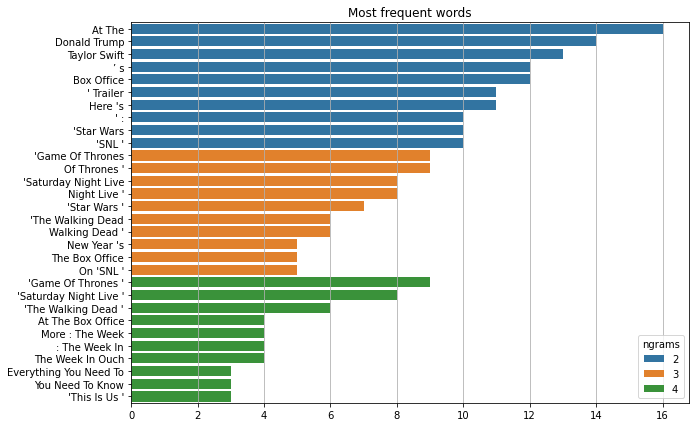

# SPORTS:


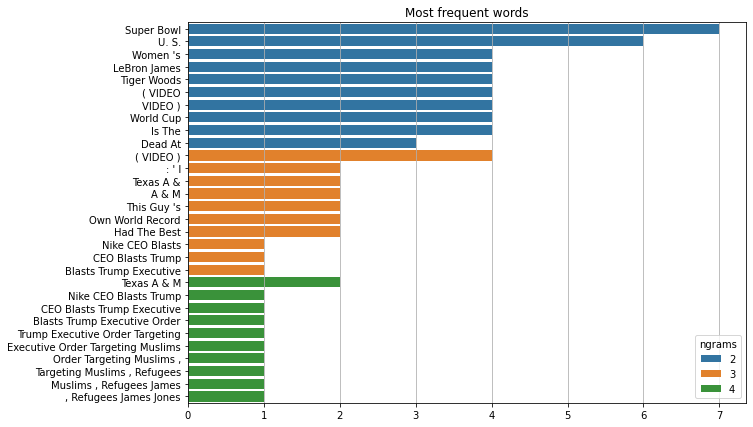

# TECH:


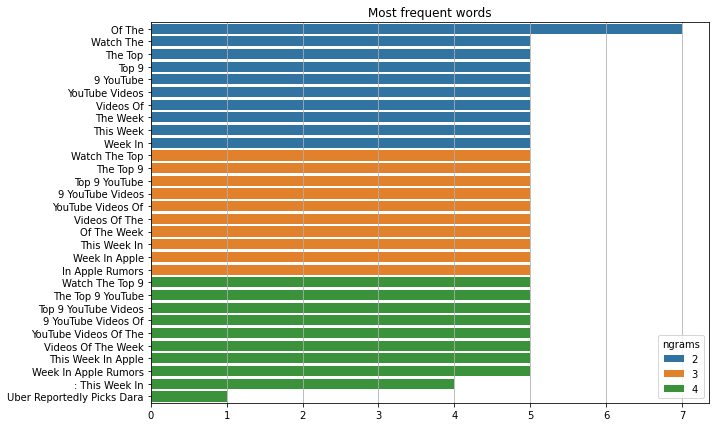

In [35]:
dtf_freq = pd.DataFrame()
for y in dtf_n["y"].unique():
    print("# {}:".format(y))
    dtf_y = word_freq(corpus=dtf_n[dtf_n["y"]==y]["text_clean"], ngrams=[2,3,4], top=10, figsize=(10,7))
    dtf_y["y"] = y
    dtf_freq = dtf_freq.append(dtf_y)

In [36]:
dtf_freq.sample(5)

,word,freq,ngrams,y
5694,With Female Co-Stars,1,3,ENTERTAINMENT
1373,Is Hosting Female Tournament,1,4,SPORTS
5143,Drop By,1,2,ENTERTAINMENT
1025,Venus Williams,1,2,SPORTS
3966,Rose McGowan Is,1,3,ENTERTAINMENT


# ENTERTAINMENT:


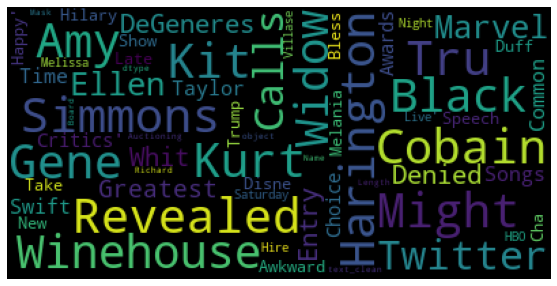

# SPORTS:


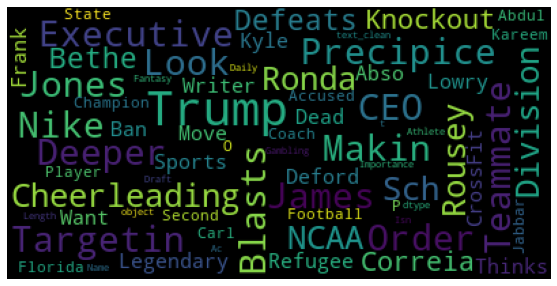

# TECH:


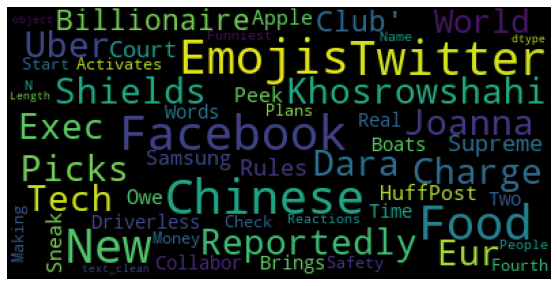

In [37]:
for y in dtf_n["y"].unique():
    print("# {}:".format(y))
    plot_wordcloud(corpus=dtf_n[dtf_n["y"]==y]["text_clean"], max_words=150, max_font_size=35, figsize=(10,5))

In [38]:
# add specific words as features
dtf_n = add_word_freq(dtf_n, "text_clean", lst_words=["new york","new","york"], freq="count")
dtf_n.head()

found records:
['new york: 0', 'new: 3', 'york: 0']


,y,text,lang,text_tagged,tags,tags_PERSON,tags_LOC,tags_FAC,tags_ORG,tags_PRODUCT,...,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment,new york,new,york
80156,ENTERTAINMENT,Kit Harington Might Have Just Revealed The Tru...,en,Kit_Harington Might Have Just Revealed The_Tru...,"[{('Kit Harington', 'PERSON'): 1}, {('The True...",1,0,0,0,0,...,Kit Harington Might Have Just Revealed The Tru...,12,53,1,4.416667,12.0,0.675000,NaN,NaN,NaN
143199,ENTERTAINMENT,Gene Simmons On Kurt Cobain And Amy Winehouse:...,en,Gene_Simmons On Kurt_Cobain And Amy_Winehouse:...,"[{('Gene Simmons', 'PERSON'): 1}, {('Kurt Coba...",3,0,0,0,0,...,Gene Simmons On Kurt Cobain And Amy Winehouse:...,23,83,1,3.608696,23.0,0.500000,NaN,NaN,NaN
83967,ENTERTAINMENT,Where's Black Widow? Twitter Calls Marvel Out ...,en,Where's Black_Widow? Twitter Calls Marvel_Out_...,"[{('Black Widow', 'EVENT'): 1}, {('Marvel Out ...",0,0,0,0,0,...,Where's Black Widow? Twitter Calls Marvel Out ...,14,61,2,4.357143,7.0,0.416667,NaN,NaN,NaN
41733,ENTERTAINMENT,Ellen DeGeneres Was Denied Entry Into The Whit...,en,Ellen_DeGeneres_Was Denied Entry Into The Whit...,"[{('Ellen DeGeneres Was', 'PERSON'): 1}, {('Si...",1,0,0,1,0,...,Ellen DeGeneres Was Denied Entry Into The Whit...,13,65,1,5.000000,13.0,0.500000,NaN,NaN,NaN
35778,SPORTS,Nike CEO Blasts Trump Executive Order Targetin...,en,Nike CEO Blasts Trump_Executive_Order_Targetin...,"[{('Nike', 'ORG'): 1}, {('Trump Executive Orde...",0,0,0,2,0,...,Nike CEO Blasts Trump Executive Order Targetin...,10,57,1,5.700000,10.0,0.500000,NaN,NaN,NaN


###### Summary

In [39]:
# keeping all the features
dtf_n.head()

,y,text,lang,text_tagged,tags,tags_PERSON,tags_LOC,tags_FAC,tags_ORG,tags_PRODUCT,...,text_clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_lenght,sentiment,new york,new,york
80156,ENTERTAINMENT,Kit Harington Might Have Just Revealed The Tru...,en,Kit_Harington Might Have Just Revealed The_Tru...,"[{('Kit Harington', 'PERSON'): 1}, {('The True...",1,0,0,0,0,...,Kit Harington Might Have Just Revealed The Tru...,12,53,1,4.416667,12.0,0.675000,NaN,NaN,NaN
143199,ENTERTAINMENT,Gene Simmons On Kurt Cobain And Amy Winehouse:...,en,Gene_Simmons On Kurt_Cobain And Amy_Winehouse:...,"[{('Gene Simmons', 'PERSON'): 1}, {('Kurt Coba...",3,0,0,0,0,...,Gene Simmons On Kurt Cobain And Amy Winehouse:...,23,83,1,3.608696,23.0,0.500000,NaN,NaN,NaN
83967,ENTERTAINMENT,Where's Black Widow? Twitter Calls Marvel Out ...,en,Where's Black_Widow? Twitter Calls Marvel_Out_...,"[{('Black Widow', 'EVENT'): 1}, {('Marvel Out ...",0,0,0,0,0,...,Where's Black Widow? Twitter Calls Marvel Out ...,14,61,2,4.357143,7.0,0.416667,NaN,NaN,NaN
41733,ENTERTAINMENT,Ellen DeGeneres Was Denied Entry Into The Whit...,en,Ellen_DeGeneres_Was Denied Entry Into The Whit...,"[{('Ellen DeGeneres Was', 'PERSON'): 1}, {('Si...",1,0,0,1,0,...,Ellen DeGeneres Was Denied Entry Into The Whit...,13,65,1,5.000000,13.0,0.500000,NaN,NaN,NaN
35778,SPORTS,Nike CEO Blasts Trump Executive Order Targetin...,en,Nike CEO Blasts Trump_Executive_Order_Targetin...,"[{('Nike', 'ORG'): 1}, {('Trump Executive Orde...",0,0,0,2,0,...,Nike CEO Blasts Trump Executive Order Targetin...,10,57,1,5.700000,10.0,0.500000,NaN,NaN,NaN
